# DAT210x - Programming with Python for DS

## Module4- Lab3

This code is intentionally missing! Read the directions on the course lab page!

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib

# Look pretty...
matplotlib.style.use('ggplot')

In [27]:
def scaleFeaturesDF(df):
    # Feature scaling is a type of transformation that only changes the
    # scale, but not number of features. Because of this, we can still
    # use the original dataset's column names... so long as we keep in
    # mind that the _units_ have been altered:

    scaled = preprocessing.StandardScaler().fit_transform(df)
    scaled = pd.DataFrame(scaled, columns=df.columns)
    
    print("New Variances:\n", scaled.var())
    print("New Describe:\n", scaled.describe())
    return scaled

In [28]:
def drawVectors(transformed_features, components_, columns, plt, scaled):
    if not scaled:
        return plt.axes() # No cheating ;-)

    num_columns = len(columns)

    # This funtion will project your *original* feature (columns)
    # onto your principal component feature-space, so that you can
    # visualize how "important" each one was in the
    # multi-dimensional scaling

    # Scale the principal components by the max value in
    # the transformed set belonging to that component
    xvector = components_[0] * max(transformed_features[:,0])
    yvector = components_[1] * max(transformed_features[:,1])

    ## visualize projections

    # Sort each column by it's length. These are your *original*
    # columns, not the principal components.
    important_features = { columns[i] : math.sqrt(xvector[i]**2 + yvector[i]**2) for i in range(num_columns) }
    important_features = sorted(zip(important_features.values(), important_features.keys()), reverse=True)
    print("Features by importance:\n", important_features)

    ax = plt.axes()

    for i in range(num_columns):
        # Use an arrow to project each original feature as a
        # labeled vector on your principal component axes
        plt.arrow(0, 0, xvector[i], yvector[i], color='b', width=0.0005, head_width=0.02, alpha=0.75)
        plt.text(xvector[i]*1.2, yvector[i]*1.2, list(columns)[i], color='b', alpha=0.75)

    return ax

In [29]:
# Do * NOT * alter this line, until instructed!
scaleFeatures = False

In [30]:
df = pd.read_csv('Datasets/kidney_disease.csv')

In [31]:
labels = ['red' if i=='ckd' else 'green' for i in df.classification]

In [32]:
df.drop(labels = ['id', 'classification', 'rbc', 'pc', 'pcc', 'ba', 'htn', 'dm', 'cad', 'appet', 'pe', 'ane'], axis = 1, inplace = True)
df.head()


,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
0,48.0,80.0,1.020,1.0,0.0,121.0,36.0,1.2,NaN,NaN,15.4,44,7800,5.2
1,7.0,50.0,1.020,4.0,0.0,NaN,18.0,0.8,NaN,NaN,11.3,38,6000,NaN
2,62.0,80.0,1.010,2.0,3.0,423.0,53.0,1.8,NaN,NaN,9.6,31,7500,NaN
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32,6700,3.9
4,51.0,80.0,1.010,2.0,0.0,106.0,26.0,1.4,NaN,NaN,11.6,35,7300,4.6


In [33]:

# 2. Right after you print out your dataset's dtypes, add an exit() so you can inspect the results. Does everything
# look like it should/properly numeric? If not, make code changes to coerce the remaining column(s).
df.dtypes


age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv      object
wc       object
rc       object
dtype: object

In [34]:
# The pcv, wc, and rc columns are still of type 'object'.
df.pcv = pd.to_numeric(df.pcv, errors = 'coerce')
df.wc = pd.to_numeric(df.wc, errors = 'coerce')
df.rc = pd.to_numeric(df.rc, errors = 'coerce')

In [35]:
df.dtypes

age     float64
bp      float64
sg      float64
al      float64
su      float64
bgr     float64
bu      float64
sc      float64
sod     float64
pot     float64
hemo    float64
pcv     float64
wc      float64
rc      float64
dtype: object

In [36]:
# Need to remove the NaN values from the dataframe:
df.dropna(axis = 0, how = 'any', inplace = True)
df.head()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo,pcv,wc,rc
3,48.0,70.0,1.005,4.0,0.0,117.0,56.0,3.8,111.0,2.5,11.2,32.0,6700.0,3.9
5,60.0,90.0,1.015,3.0,0.0,74.0,25.0,1.1,142.0,3.2,12.2,39.0,7800.0,4.4
9,53.0,90.0,1.020,2.0,0.0,70.0,107.0,7.2,114.0,3.7,9.5,29.0,12100.0,3.7
11,63.0,70.0,1.010,3.0,0.0,380.0,60.0,2.7,131.0,4.2,10.8,32.0,4500.0,3.8
12,68.0,70.0,1.015,3.0,1.0,208.0,72.0,2.1,138.0,5.8,9.7,28.0,12200.0,3.4


In [37]:
# TODO: PCA Operates based on variance. The variable with the greatest variance will dominate. Go ahead and peek into your data using
# a command that will check the variance of every feature in your dataset. Print out the results. Also print out the results of
# running .describe on your dataset.
#
# Hint: If you don't see all three variables: 'bgr','wc' and 'rc', then you probably didn't complete the previous step properly.
#
# .. your code here ..
df.var()

age     2.446577e+02
bp      1.330391e+02
sg      3.186973e-05
al      1.849583e+00
su      9.443008e-01
bgr     5.696682e+03
bu      2.095073e+03
sc      8.668748e+00
sod     4.772204e+01
pot     9.520765e+00
hemo    8.026738e+00
pcv     7.985587e+01
wc      8.568807e+06
rc      1.002693e+00
dtype: float64

In [38]:
# TODO: This method assumes your dataframe is called df. If it isn't, make the appropriate changes. Don't alter the code
# in scaleFeatures() just yet though!
#
# .. your code adjustment here ..
if scaleFeatures: df = scaleFeatures(df)

In [39]:
# TODO: Run PCA on your dataset and reduce it to 2 components. Ensure your PCA instance is saved in a variable called 'pca',
# and that the results of your transformation are saved in 'T'.
#
# .. your code here ..
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(df)
T = pca.transform(df)

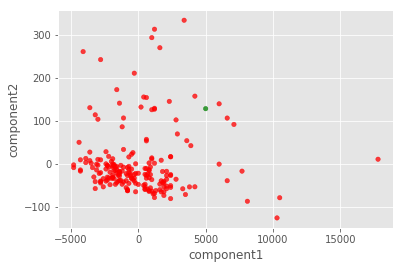

In [40]:
# Plot the transformed data as a scatter plot. Recall that transforming the data will result in a NumPy NDArray. You can
# either use MatPlotLib to graph it directly, or you can convert it to DataFrame and have pandas do it for you.
#
# Since we've already demonstrated how to plot directly with MatPlotLib in Module4/assignment1.py, this time we'll convert
# to a Pandas Dataframe.
#
# Since we transformed via PCA, we no longer have column names. We know we are in P.C. space, so we'll just define the
# coordinates accordingly:
ax = drawVectors(T, pca.components_, df.columns.values, plt, scaleFeatures)
T = pd.DataFrame(T)
T.columns = ['component1', 'component2']
T.plot.scatter(x='component1', y='component2', marker='o', c = labels, alpha=0.75, ax=ax)
plt.show()

In [33]:
df=pd.ExcelFile("../../../../../../Desktop/scrum.xlsx")

In [34]:
df=df.parse("Sheet1")
df.head()

,Id,Frage,True_False,all_of_these,1fach_Antwort,3-Fach_Antwort,2-Fach_Antwort
0,1,An abnormal termination of a Sprint is called ...,NaN,NaN,When the Product Owner determines that it make...,NaN,NaN
1,2,Development Team members volunteer to own a Sp...,NaN,NaN,"Never. All Sprint Backlog Items are ""owned"" by...",NaN,NaN
2,3,Who is responsible for registering the work es...,NaN,NaN,The Development Team.,NaN,NaN
3,4,"When multiple teams are working together, each...",False,NaN,NaN,NaN,NaN
4,5,"An organization has decided to adopt Scrum, bu...",NaN,All answers apply.\n - Without a new vocabular...,NaN,NaN,NaN


In [30]:
df_T_F=df.iloc[:,0:3]
df_T_F.head()

,Id,Frage,True_False
0,1,An abnormal termination of a Sprint is called ...,NaN
1,2,Development Team members volunteer to own a Sp...,NaN
2,3,Who is responsible for registering the work es...,NaN
3,4,"When multiple teams are working together, each...",False
4,5,"An organization has decided to adopt Scrum, bu...",NaN


In [31]:
df_T_F=df_T_F.dropna(how="any")
df_T_F.head()

,Id,Frage,True_False
3,4,"When multiple teams are working together, each...",False
9,10,It is mandatory that the product increment be ...,False
16,17,"Scrum Master is a ""management"" position?",True
23,24,"Scrum does not have a role called ""project man...",True
37,38,The Scrum Master should not allow the Product ...,False


In [32]:
df_T_F.to_excel("scrum-true_false.xlsx",index=False)

In [37]:
df_ot=df.iloc[:,[0,1,3,4,5,6]]
df_ot.head()

,Id,Frage,all_of_these,1fach_Antwort,3-Fach_Antwort,2-Fach_Antwort
0,1,An abnormal termination of a Sprint is called ...,NaN,When the Product Owner determines that it make...,NaN,NaN
1,2,Development Team members volunteer to own a Sp...,NaN,"Never. All Sprint Backlog Items are ""owned"" by...",NaN,NaN
2,3,Who is responsible for registering the work es...,NaN,The Development Team.,NaN,NaN
3,4,"When multiple teams are working together, each...",NaN,NaN,NaN,NaN
4,5,"An organization has decided to adopt Scrum, bu...",All answers apply.\n - Without a new vocabular...,NaN,NaN,NaN


In [38]:
df_ot.to_excel("scrum-other.xlsx",index=False)